In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [2]:
employee_data = pd.read_csv("Employee_data.csv")

In [3]:
employee_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
employee_data.shape

(14999, 10)

In [6]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
employee_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [8]:
employee_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
employee_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [10]:
employee_data = employee_data.rename(columns={'sales': 'department'})

In [11]:
employee_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
employee_data.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [13]:
employee_data.replace({"salary": {"low": 0, "medium": 1, "high": 2}}, inplace = True)

In [14]:
employee_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [15]:
employee_data.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [16]:
employee_data["department"] = np.where(employee_data.department == "support", "technical", employee_data["department"])

employee_data["department"] = np.where(employee_data.department == "IT", "technical", employee_data["department"])

In [17]:
employee_data.department.value_counts()

technical      6176
sales          4140
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [18]:
employee_data.replace({"department": {"RandD": 0, "marketing": 1, "sales": 2, "management": 3, "product_mng": 4, "accounting": 5, "technical": 6, "hr": 7}}, inplace = True)

In [19]:
employee_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,2,0
1,0.80,0.86,5,262,6,0,1,0,2,1
2,0.11,0.88,7,272,4,0,1,0,2,1
3,0.72,0.87,5,223,5,0,1,0,2,0
4,0.37,0.52,2,159,3,0,1,0,2,0


In [20]:
employee_data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,-0.012406,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.019230,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.011442,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.006426,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.039997,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,-0.016352,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.037745,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.077225,0.098119
department,-0.012406,0.019230,0.011442,0.006426,-0.039997,-0.016352,0.037745,-0.077225,1.000000,-0.021358
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,-0.021358,1.000000


In [21]:
correlation = employee_data.corr()

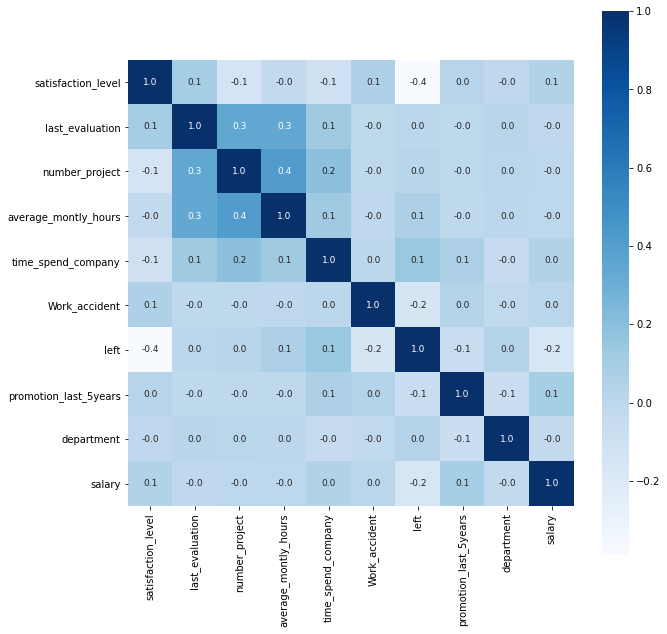

In [22]:
plt.figure(figsize = (10,10))

sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, 
            annot_kws = {'size': 9}, cmap = 'Blues')

In [23]:
X = employee_data.drop(columns = "left", axis = 1)
Y = employee_data["left"]

In [24]:
print(X)

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4          

In [25]:
print(Y)

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64


In [26]:
standardscalar = StandardScaler()

X = standardscalar.fit_transform(X)

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 40, stratify = Y)

In [28]:
Y_train, Y_test = Y_train.values, Y_test.values

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(14999, 9) (11249, 9) (3750, 9)


In [30]:
#LogisticRegression

model = LogisticRegression()

In [32]:
recursive_feature_elimination = RFE(model, 10) #selecting top 10 features for training

recursive_feature_elimination.fit(X_train, Y_train)

C:\Users\Sobhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


RFE(estimator=LogisticRegression(), n_features_to_select=10)

In [33]:
X_train_prediction = recursive_feature_elimination.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [34]:
print("Accuracy on Training Data: ", training_data_accuracy)

Accuracy on Training Data:  0.7918926126766823


In [35]:
print(classification_report(X_train_prediction, Y_train))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      9670
           1       0.36      0.61      0.45      1579

    accuracy                           0.79     11249
   macro avg       0.64      0.71      0.66     11249
weighted avg       0.85      0.79      0.81     11249



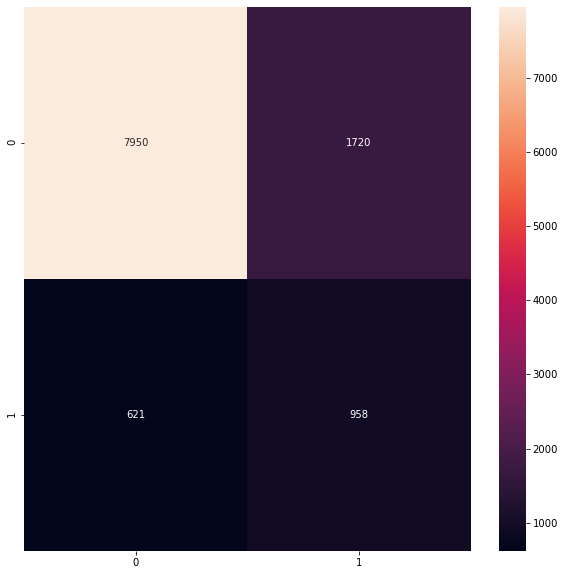

In [36]:
plt.figure(figsize = (10,10))

sns.heatmap(confusion_matrix(X_train_prediction, Y_train), annot = True, fmt = "g")

In [37]:
X_test_prediction = recursive_feature_elimination.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [38]:
print("Accuracy on Test Data: ", test_data_accuracy)

Accuracy on Test Data:  0.7872


In [39]:
print(classification_report(X_test_prediction, Y_test))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      3259
           1       0.33      0.60      0.42       491

    accuracy                           0.79      3750
   macro avg       0.63      0.71      0.65      3750
weighted avg       0.85      0.79      0.81      3750



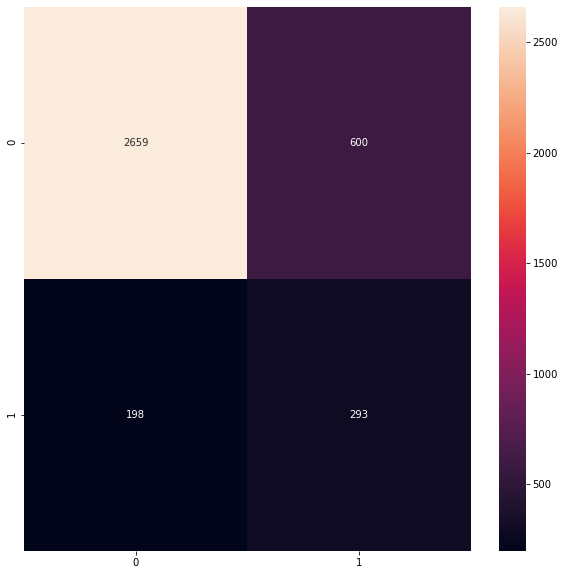

In [40]:
plt.figure(figsize = (10,10))

sns.heatmap(confusion_matrix(X_test_prediction, Y_test), annot = True, fmt = "g")

In [41]:
#RandomForest

random_forest = RandomForestClassifier()

In [42]:
random_forest.fit(X_train, Y_train)

RandomForestClassifier()

In [43]:
X_test_prediction = random_forest.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [44]:
print("Accuracy on Test Data: ", test_data_accuracy)

Accuracy on Test Data:  0.9882666666666666


In [45]:
X_train_prediction = random_forest.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [46]:
print("Accuracy on Training Data: ", training_data_accuracy)

Accuracy on Training Data:  0.9999111032091742
